In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
from pandas import Series, DataFrame, read_csv


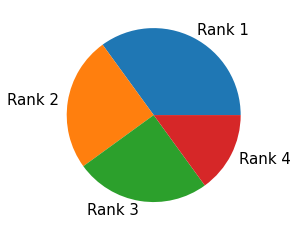

In [32]:

y = np.array([35, 25, 25, 15])
mylabels = ["Rank 1", "Rank 2", "Rank 3", "Rank 4"]

plt.pie(y, labels = mylabels)
plt.show() 

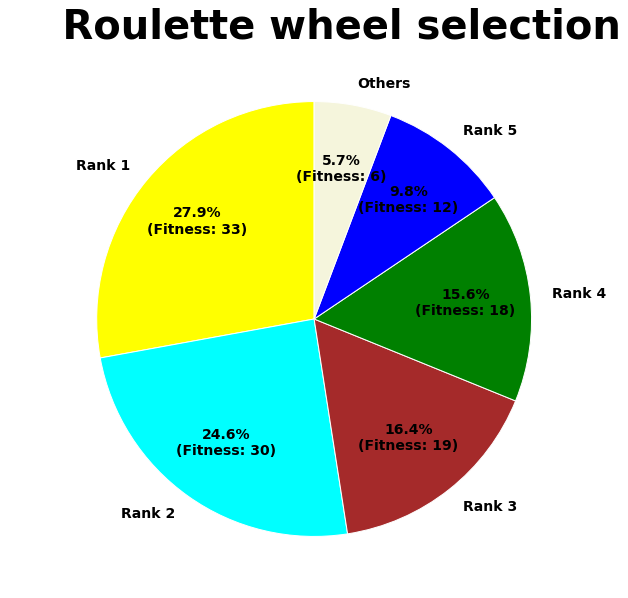

In [28]:
labels = ["Rank 1", "Rank 2", "Rank 3", "Rank 4", "Rank 5", "Others"]
data = [34, 30, 20, 19, 12, 7]
colors = ( "yellow", "cyan", "brown", "green", "blue", "beige")
 
wp = { 'linewidth' : 1, 'edgecolor' : "white" }
 
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n(Fitness: {:d})".format(pct, absolute)
 
fig, ax = plt.subplots(figsize =(15, 10))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  labels = labels,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  labeldistance=1.1,
                                  pctdistance=0.7
                                  )
 
# plt.setp(autotexts, size = 12, weight ="bold")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)

ax.set_title("    Roulette wheel selection", fontsize = 40, fontweight=800)

plt.show()

-1000 0


<AxesSubplot:>

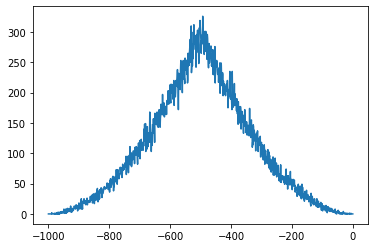

In [65]:
def closestToTarget(p, target, size, amount):
    upperLim = size//2 + target
    lowerLim = target - size//2
    print(lowerLim, upperLim)
    distribution = {i:0 for i in range(lowerLim, upperLim+1)}
    for _ in range(amount):
        c = 100000
        index = 0
        for i, v in enumerate([random.randint(lowerLim, upperLim) for _ in range(p)]):
            if abs(v - target) < c:
                c = abs(v)
                index = i
        distribution[v] += 1
    Series(distribution).plot()



target = -500
size = 1000
upperLim = size//2 + target
lowerLim = target - size//2
print(lowerLim, upperLim)
distribution = {i:0 for i in range(lowerLim, upperLim+1)}

def closestToTarget(p, target):
    c = 100000
    va = 0
    for i, v in enumerate([random.randint(lowerLim, upperLim) for _ in range(p)]):
        if abs(v - target) < c:
            c = abs(v - target)
            va = v
    return va

def choo(n):
    # print([random.randint(size, size) for _ in range(n)])
    return closestToTarget(n, target)

for _ in range(100000):
    index = choo(3)
    
    distribution[index] += 1
distribution
Series(distribution).plot()


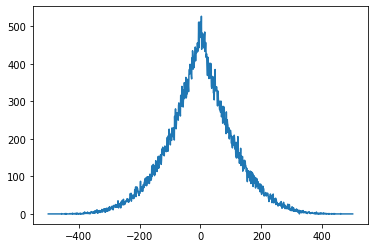

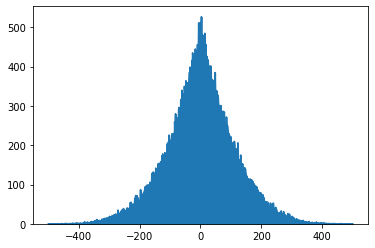

In [183]:
def closestToTarget(p, target, size, amount):
    upperLim = size//2 + target
    lowerLim = target - size//2
    distribution = {i:0 for i in range(lowerLim, upperLim+1)}
    for _ in range(amount):
        c = 100000
        val = 0
        for _, v in enumerate([random.randint(lowerLim, upperLim) for _ in range(p)]):
            if abs(v - target) < c:
                c = abs(v - target)
                val = v
        distribution[val] += 1
    Series(distribution).plot()
    plt.show()
    Series(distribution).plot(kind="area")

target = 0
size = 1000
amount = 100000
closestToTarget(5, target, size, amount)
# plt.show()

# upperLim = size//2 + target
# lowerLim = target - size//2

# distribution = {i:0 for i in range(lowerLim, upperLim+1)}
# for i in range(10000):
#     v = int(random.gauss(target, 200))
#     if v > upperLim or v < lowerLim: continue
#     distribution.setdefault(v, 0)
#     distribution[v] += 1
# Series(distribution).plot()

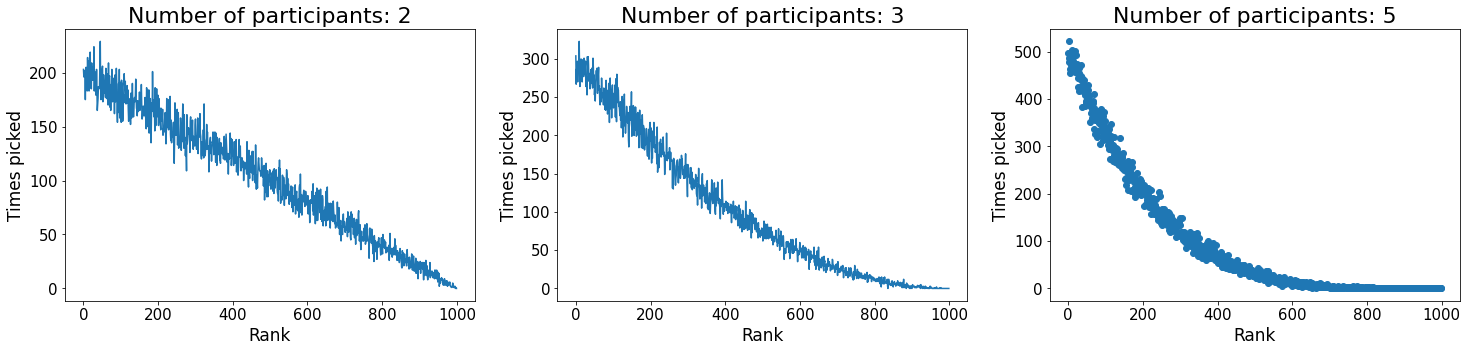

In [250]:
def tournamentDistribution(samples):
    size = 1000
    distribution = {i:0 for i in range(size)}

    def chooseParent(n):
        return min([random.randint(0, size-1) for _ in range(n)])
    
    for _ in range(100000):
        index = chooseParent(samples)
        distribution[index] += 1
    return distribution

td2 = tournamentDistribution(2)
td3 = tournamentDistribution(3)
td5 = tournamentDistribution(5)
td7 = tournamentDistribution(7)

fontsize = 22

plt.figure(figsize=(25,5))

plt.subplot(131)
plt.plot(td2.keys(), td2.values())
plt.ylabel("Times picked", fontsize=int(fontsize*0.8))
plt.xlabel("Rank", fontsize=int(fontsize*0.8))
plt.title("Number of participants: 2", fontsize = fontsize)

plt.subplot(132)
plt.plot(td3.keys(), td3.values())
plt.ylabel("Times picked", fontsize=int(fontsize*0.8))
plt.xlabel("Rank", fontsize=int(fontsize*0.8))
plt.title("Number of participants: 3", fontsize = fontsize)

plt.subplot(133)
plt.scatter(td5.keys(), td5.values())
plt.ylabel("Times picked", fontsize=int(fontsize*0.8))
plt.xlabel("Rank", fontsize=int(fontsize*0.8))
plt.title("Number of participants: 5", fontsize = fontsize)

plt.show()



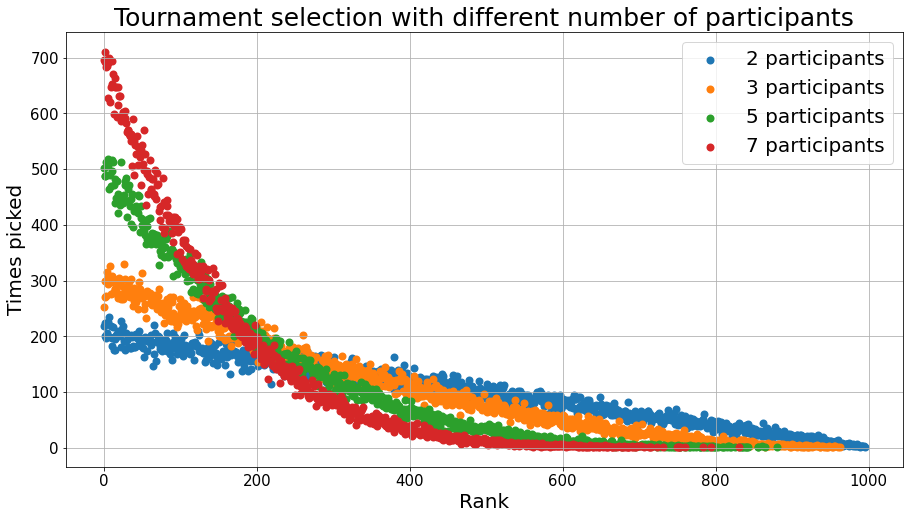

In [264]:
# td2 = tournamentDistribution(2)
# td3 = tournamentDistribution(3)
# td5 = tournamentDistribution(5)
# td8 = tournamentDistribution(8)

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


def plottingTournament(participants):
    legend = []
    plt.figure(figsize=(15,8))
    for p in participants:
        legend.append(f"{p} participants")
        td = tournamentDistribution(p)
        td = {k: v for k, v in td.items() if v}
        plt.scatter(td.keys(), td.values(), marker="o", alpha=1, edgecolors=None, linewidths=2)
        # plt.plot(td.keys(), td.values(), linewidth=2)

    plt.ylabel("Times picked")
    plt.xlabel("Rank")
    plt.legend(legend)
    plt.title("Tournament selection with different number of participants", fontsize=BIGGER_SIZE)
    plt.grid()
    plt.show()

plottingTournament([2,3,5,7])


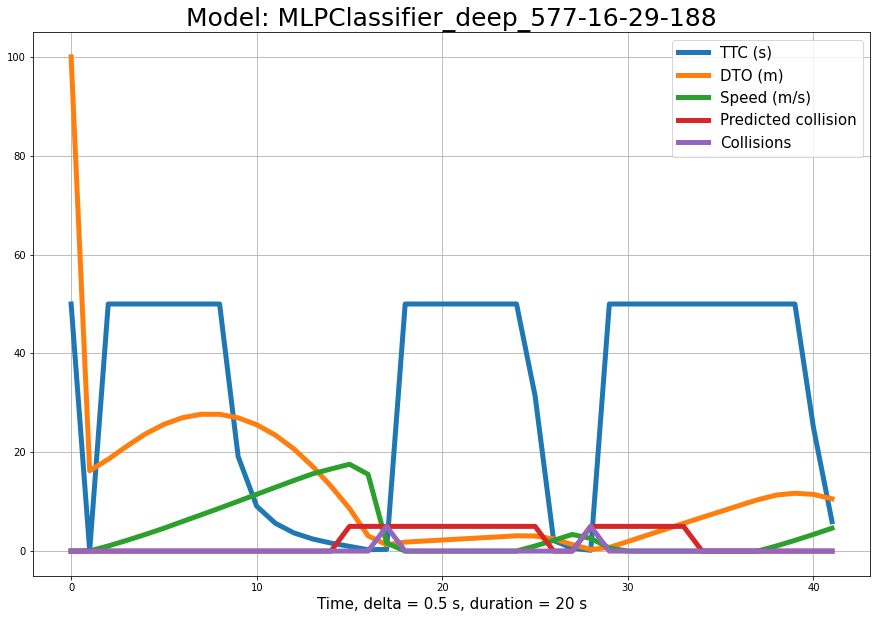

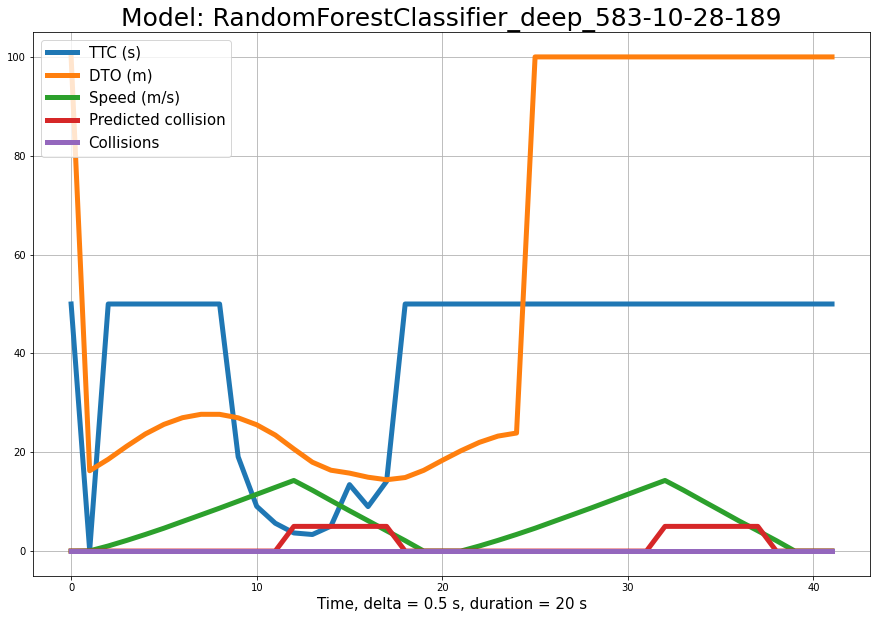

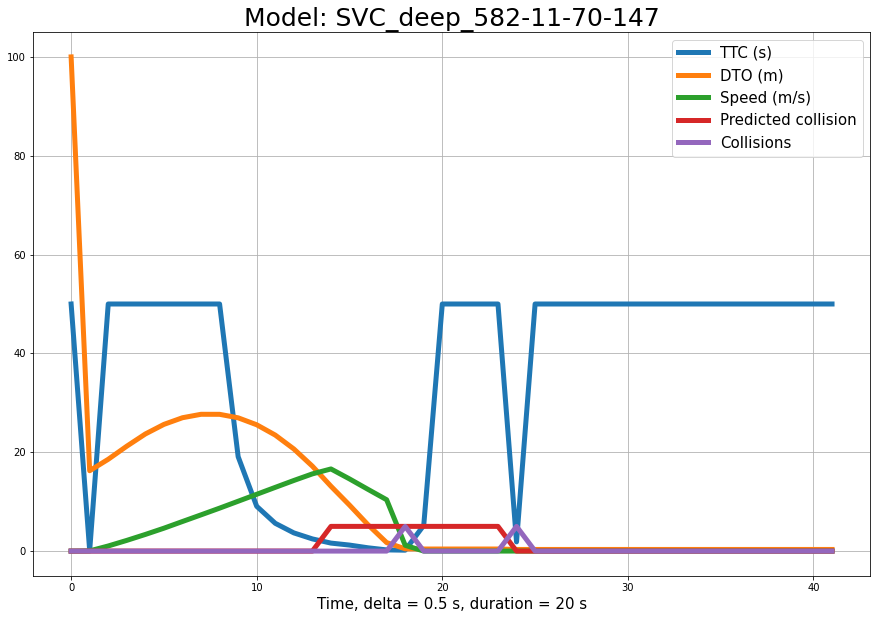

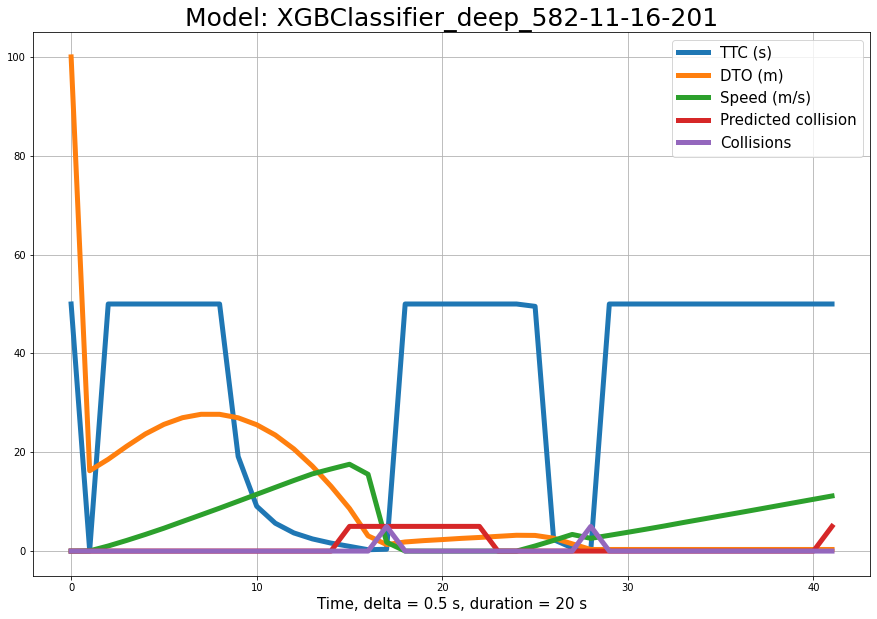

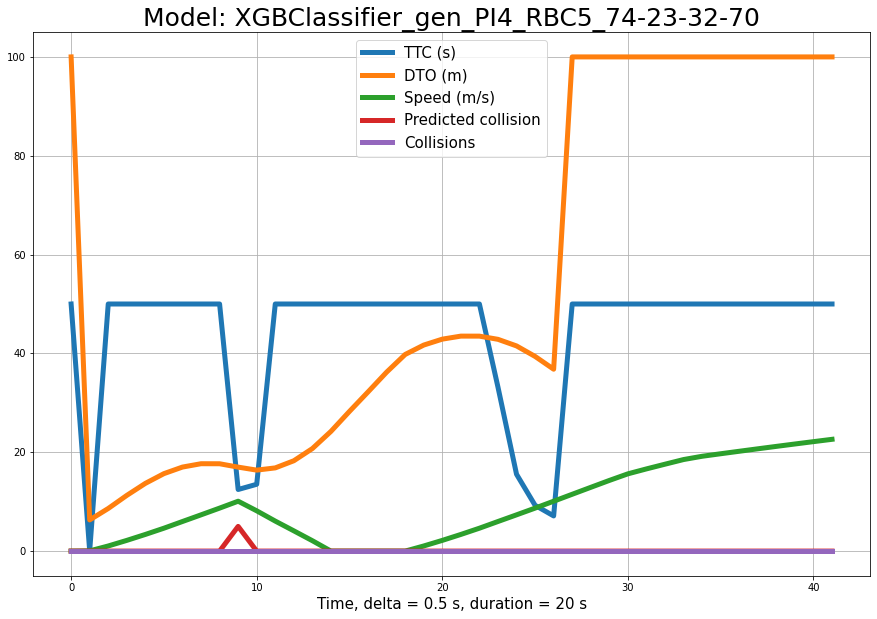

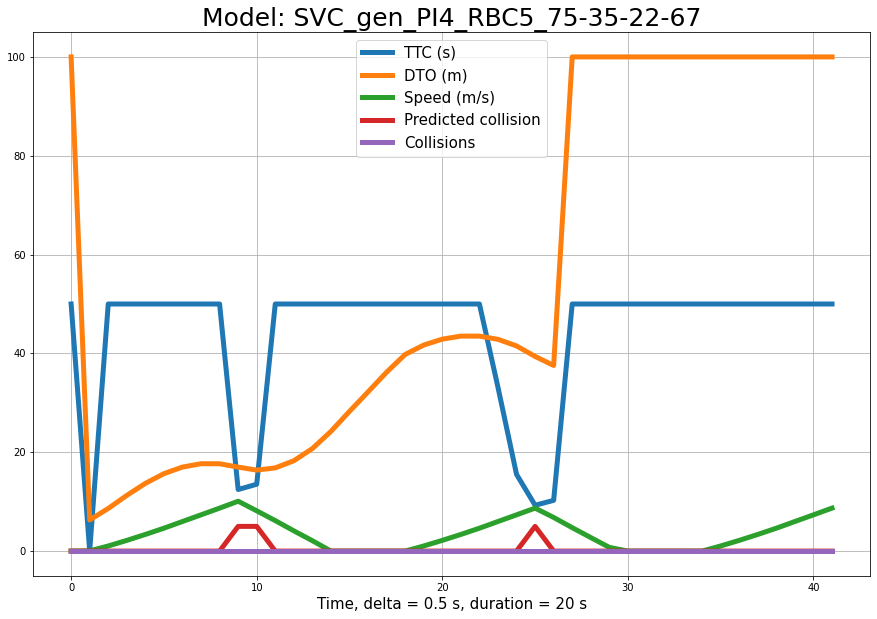

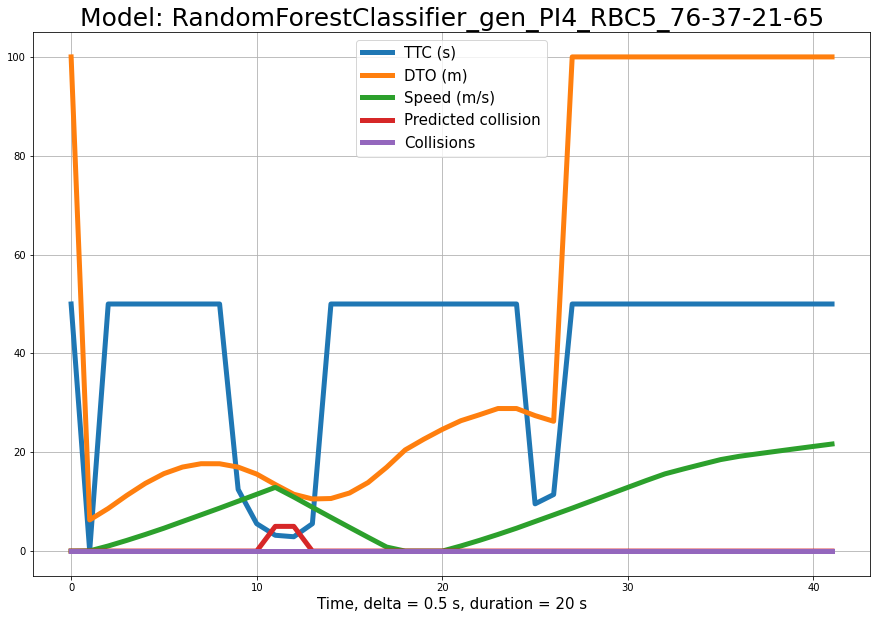

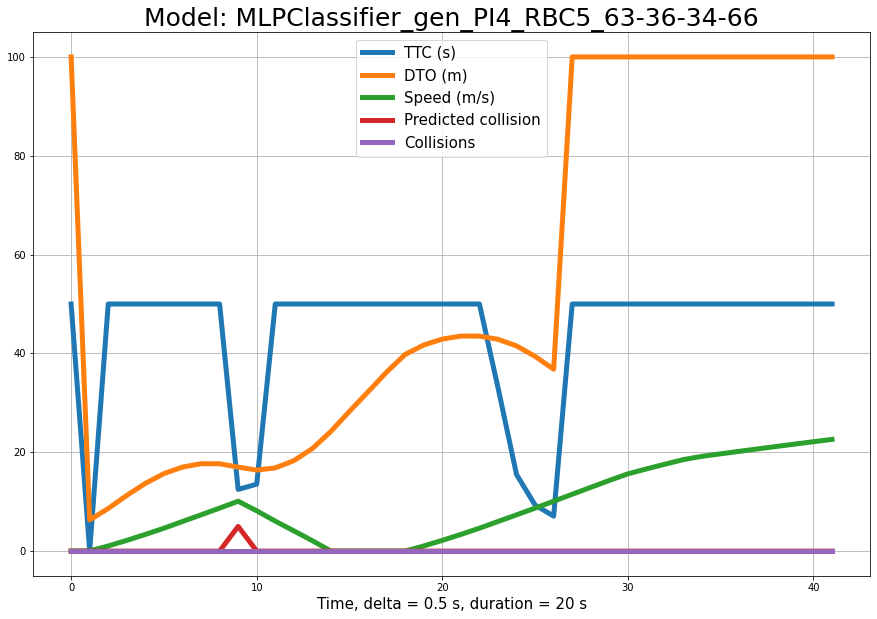

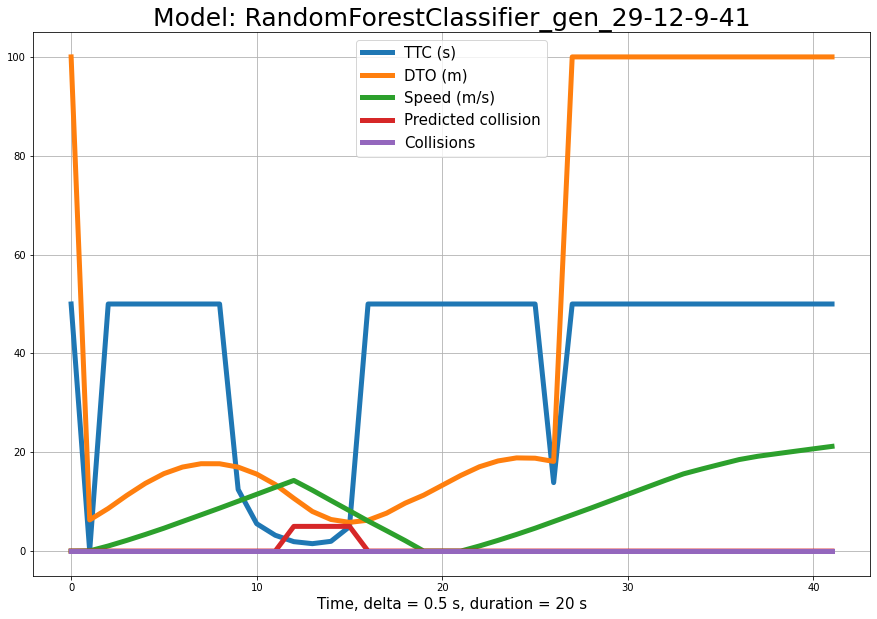

In [25]:
def plotInfo(infoDict, model):
    labels = [
        "TTC (s)",
        "DTO (m)",
        "Speed (m/s)",
        # "Jerk (m/s^3)", 
        # "Acceleration (m/s^2)",
        "Predicted collision",
        "Collisions"
        ]
    cols = [
        "ttc", 
        "dto", 
        "speed", 
        # "jerks", 
        # "accelerations", 
        "predictions", 
        "col"]
    font_xs = 10
    font_s = 15
    font_m = 20
    font_l = 25

    for col in ["predictions", "col"]:
        for i, val in enumerate(info[col]):
            if val == 1:
                infoDict[col][i] = 5

    plt.figure(figsize=(15,10))
    for col, label in zip(cols, labels):
        # print(col, infoDict[col])
        plt.plot(infoDict["time"], infoDict[col], label=label, linewidth=5)

    plt.xlabel(f"Time, delta = {infoDict['interval'][0]} s, duration = {infoDict['duration'][0]} s", fontsize=font_s)
    plt.xticks(fontsize=font_xs)
    plt.yticks(fontsize=font_xs)
    plt.legend(fontsize=font_s)
    plt.grid()
    plt.title(f"Model: {model}", fontsize=font_l)
    plt.savefig(f"../data/figures/{model}")
    plt.show()
    



models =[
    "MLPClassifier_deep_577-16-29-188",
    "RandomForestClassifier_deep_583-10-28-189",
    "SVC_deep_582-11-70-147",
    "XGBClassifier_deep_582-11-16-201",
    "XGBClassifier_gen_PI4_RBC5_74-23-32-70",
    "SVC_gen_PI4_RBC5_75-35-22-67",
    "RandomForestClassifier_gen_PI4_RBC5_76-37-21-65",
    "MLPClassifier_gen_PI4_RBC5_63-36-34-66",
    "RandomForestClassifier_gen_29-12-9-41"
    ]

for model in models:
    info = read_csv(f"../data/fromUsingSim/{model}.csv")
    infoDict = info.to_dict("list")
    plotInfo(infoDict, model)